In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import warnings
warnings.filterwarnings(action='ignore')
from statsmodels.tsa.seasonal import seasonal_decompose
import statsmodels.formula.api as formula
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels as sm
from sklearn import preprocessing
from sklearn.model_selection import train_test_split,GridSearchCV,RandomizedSearchCV
from sklearn.linear_model import LinearRegression,Lasso,Ridge
#from sklearn.externals import joblib
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from IPython.display import display
from sklearn import metrics

In [37]:
data = pd.read_excel (r'D:\Downloads\rk_month.xlsx')
data['From Date']=pd.to_datetime(data['From Date'])
data['year'] = data['From Date'].dt.year
data['month'] = data['From Date'].dt.month
data['day'] = data['From Date'].dt.day

In [38]:
import datetime as dt

In [39]:
data['From Date']= data['From Date'].map(dt.datetime.toordinal)

In [40]:
df=data.loc['0':'365']

In [41]:
X1 = df[['From Date','year', 'month', 'day']]
Y1 = df['PM1']

In [42]:
xtrain,xtest,ytrain,ytest = train_test_split(X1,Y1,test_size=.2,random_state=6)

In [43]:
grad_boost = GradientBoostingRegressor(n_estimators=1000,
                                      max_depth=8,
                                      max_features='auto',
                                      min_samples_split=3,
                                      min_samples_leaf=3,
                                      learning_rate=0.1)

grad_boost.fit(xtrain,ytrain)

GradientBoostingRegressor(max_depth=8, max_features='auto', min_samples_leaf=3,
                          min_samples_split=3, n_estimators=1000)

In [44]:
# we now score the model
print('Score on train data: {}\n'.format(grad_boost.score(xtrain,ytrain)))
print('Score on test data: {}\n'.format(grad_boost.score(xtest,ytest)))

gboost_pred = grad_boost.predict(xtest)
gboost_mse = mean_squared_error(ytest,gboost_pred)
gboost_accuracy = r2_score(ytest,gboost_pred)

print('Root Mean Squared Error: {}\n'.format(np.sqrt(gboost_mse)))
print('Overall model accuracy: {}'.format(gboost_accuracy))

Score on train data: 0.9999999922522298

Score on test data: 0.7856782758801027

Root Mean Squared Error: 57.40286669317647

Overall model accuracy: 0.7856782758801027


In [45]:
test=data.loc['366':'418']
X=test[['From Date','year', 'month', 'day']]
X

,From Date,year,month,day
366,737436,2020,1,12
367,737443,2020,1,19
368,737450,2020,1,26
369,737457,2020,2,2
370,737464,2020,2,9
371,737471,2020,2,16
372,737478,2020,2,23
373,737485,2020,3,1
374,737492,2020,3,8
375,737499,2020,3,15


In [46]:
predict=grad_boost.predict(X)

In [47]:
predict

array([340.67158834, 362.09487556, 231.56949958, 195.9108343 ,
       226.79287972, 248.29818442, 194.42930553, 223.28911503,
       198.32855677, 185.03550537, 130.02056617, 168.79093396,
       191.03904249, 206.72737097, 159.39900981, 160.35696952,
       171.93500062, 244.16061822, 198.12553496, 147.78179095,
       200.45082408, 189.09015061, 217.83012956, 183.11770492,
       157.7670761 , 182.49375762,  93.47835292,  95.92816974,
        80.12655503,  64.3760511 , 139.61305195,  86.50047615,
        72.23890432, 115.65637815,  96.74033074, 130.00793495,
       122.18450739, 148.2733846 , 121.74417868, 186.28456724,
       232.08763349, 234.80662409, 227.36999865, 338.71084587,
       285.45252921, 271.91789826, 371.30585962, 311.96107565,
       283.51175907, 274.28801156, 338.05852534, 331.98191727])

In [48]:
X['From Date']= X['From Date'].map(dt.datetime.fromordinal)

In [49]:
test['From Date']= test['From Date'].map(dt.datetime.fromordinal)

In [50]:
test = test.set_index(['From Date'])
X = X.set_index(['From Date'])


In [51]:
X['pred']=predict

<AxesSubplot:xlabel='From Date'>

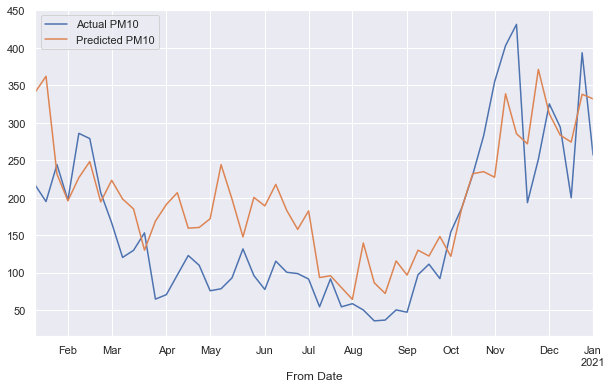

In [52]:
test['PM1'].plot(legend=True, label='Actual PM10', figsize=(10,6))
X['pred'].plot(legend=True, label='Predicted PM10')

In [53]:
np.sqrt(mean_squared_error(test['PM1'],X['pred']))

76.92879033180228

In [54]:
mae = metrics.mean_absolute_error(ytest, gboost_pred)
mse = metrics.mean_squared_error(ytest, gboost_pred)
rmsetest = np.sqrt(mse) # or mse**(0.5)  
r2 = metrics.r2_score(ytest,gboost_pred)

print("Results of sklearn.metrics:")
print("MAE:",mae)
print("MSE:", mse)
print("RMSE:", rmsetest)
print("R-Squared:", r2)

Results of sklearn.metrics:
MAE: 38.465013173100694
MSE: 3295.0891045945887
RMSE: 57.40286669317647
R-Squared: 0.7856782758801027


In [55]:
mae = metrics.mean_absolute_error(test['PM2.5'],X['pred'])
mse = metrics.mean_squared_error(test['PM2.5'],X['pred'])
rmse = np.sqrt(mse) # or mse**(0.5)  
r2 = metrics.r2_score(test['PM2.5'],X['pred'])

print("Results of sklearn.metrics:")
print("MAE:",mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R-Squared:", r2)

Results of sklearn.metrics:
MAE: 115.50710443504673
MSE: 15898.269341505482
RMSE: 126.0883394351178
R-Squared: -1.6776943418761676


In [56]:
import pickle
filename = 'PM10_gboostmodel.sav'
pickle.dump(grad_boost, open(filename, 'wb'))

In [57]:
#load model
loaded_model = pickle.load(open(filename, 'rb'))
result = loaded_model.score(xtest, ytest)
print(result)

0.7856782758801027


# 3rd plot

In [58]:
testcase = pd.DataFrame()

In [59]:
testcase['test']=ytest
testcase['pred']=gboost_pred

In [60]:
testcase["Corrected"] = np.where(testcase["pred"]<testcase["test"],testcase["pred"]+rmsetest ,
                   np.where(testcase["pred"]>testcase["test"], testcase["pred"]-rmsetest,
                            testcase["pred"]))

In [61]:
testcase

,test,pred,Corrected
365,378.930000,367.801625,425.204492
116,193.325714,225.071544,167.668678
61,205.228571,227.532812,170.129945
325,195.962857,207.197430,149.794564
100,442.442857,462.546942,405.144075
...,...,...,...
249,280.895714,291.212452,233.809586
351,61.434286,132.232876,74.830009
27,81.278571,122.791665,65.388798
19,197.158571,276.029312,218.626446


In [62]:
'''testcase['test'].plot(legend=True, label='Actual PM2.5', figsize=(10,6))
testcase['pred'].plot(legend=True, label='Predicted PM2.5')
testcase["Corrected"].plot(legend=True, label='Corrected PM2.5')'''

'testcase[\'test\'].plot(legend=True, label=\'Actual PM2.5\', figsize=(10,6))\ntestcase[\'pred\'].plot(legend=True, label=\'Predicted PM2.5\')\ntestcase["Corrected"].plot(legend=True, label=\'Corrected PM2.5\')'

In [63]:
r2 = metrics.r2_score(testcase["Corrected"],testcase['test'])
r2

0.8720559684077671

In [64]:
test2020=pd.DataFrame()

In [65]:
test2020['test']=test['PM1']
test2020['pred']=X['pred']

In [66]:
test2020.index=test.index

In [67]:
test2020["Corrected"] = np.where(test2020["pred"]<test2020["test"],test2020["pred"]+rmsetest ,
                   np.where(test2020["pred"]>test2020["test"], test2020["pred"]-rmsetest,
                            test2020["pred"]))

<AxesSubplot:xlabel='From Date'>

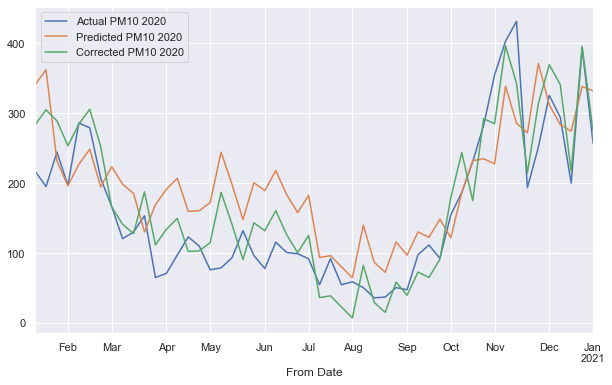

In [68]:
test2020['test'].plot(legend=True, label='Actual PM10 2020', figsize=(10,6))
test2020['pred'].plot(legend=True, label='Predicted PM10 2020')
test2020["Corrected"].plot(legend=True, label='Corrected PM10 2020')

In [69]:
r2020 = metrics.r2_score(test2020["Corrected"],test2020['test'])
r2020

0.8274407498285352

In [70]:
test2020.loc["2020-05-18":"2020-05-31",'pred'].median()

174.11630751552354

In [71]:
test2020.loc["2020-01-30":"2020-03-22",'pred'].median()

197.11969553376835